In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
sc = pyspark.SparkContext(appName="MyAppName")

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession(sc)

### Examples from the notes using pyspark

In [4]:
!wget https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv

--2023-07-08 17:35:29--  https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2772143 (2.6M) [text/plain]
Saving to: ‘diamonds.csv’

diamonds.csv        100%[===================>]   2.64M  --.-KB/s    in 0.02s   

2023-07-08 17:35:29 (147 MB/s) - ‘diamonds.csv’ saved [2772143/2772143]



In [5]:
df = spark.read.csv("diamonds.csv", header=True, inferSchema=True)
df.printSchema()

root
 |-- carat: double (nullable = true)
 |-- cut: string (nullable = true)
 |-- color: string (nullable = true)
 |-- clarity: string (nullable = true)
 |-- depth: double (nullable = true)
 |-- table: double (nullable = true)
 |-- price: integer (nullable = true)
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- z: double (nullable = true)



In [6]:
df.show(5)

+-----+-------+-----+-------+-----+-----+-----+----+----+----+
|carat|    cut|color|clarity|depth|table|price|   x|   y|   z|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+
| 0.23|  Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|
| 0.21|Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|
| 0.23|   Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|
| 0.29|Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|
| 0.31|   Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+
only showing top 5 rows



In [7]:
df.select("carat", "price").show(5)

+-----+-----+
|carat|price|
+-----+-----+
| 0.23|  326|
| 0.21|  326|
| 0.23|  327|
| 0.29|  334|
| 0.31|  335|
+-----+-----+
only showing top 5 rows



In [6]:
from pyspark.sql.functions import col
df.select(col("carat"), col("price")).show(5)

+-----+-----+
|carat|price|
+-----+-----+
| 0.23|  326|
| 0.21|  326|
| 0.23|  327|
| 0.29|  334|
| 0.31|  335|
+-----+-----+
only showing top 5 rows



In [9]:
df.filter((col("carat")<=0.21) & (col("clarity")=="VS2")).show(5)

+-----+-------+-----+-------+-----+-----+-----+----+----+----+
|carat|    cut|color|clarity|depth|table|price|   x|   y|   z|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+
|  0.2|Premium|    E|    VS2| 59.8| 62.0|  367|3.79|3.77|2.26|
|  0.2|Premium|    E|    VS2| 59.0| 60.0|  367|3.81|3.78|2.24|
|  0.2|Premium|    E|    VS2| 61.1| 59.0|  367|3.81|3.78|2.32|
|  0.2|Premium|    E|    VS2| 59.7| 62.0|  367|3.84| 3.8|2.28|
|  0.2|  Ideal|    E|    VS2| 59.7| 55.0|  367|3.86|3.84| 2.3|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+
only showing top 5 rows



In [10]:
df.orderBy("carat").show(5)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|  0.2|  Premium|    E|    VS2| 61.1| 59.0|  367|3.81|3.78|2.32|
|  0.2|Very Good|    E|    VS2| 63.4| 59.0|  367|3.74|3.71|2.36|
|  0.2|  Premium|    E|    VS2| 59.7| 62.0|  367|3.84| 3.8|2.28|
|  0.2|  Premium|    E|    VS2| 59.0| 60.0|  367|3.81|3.78|2.24|
|  0.2|    Ideal|    E|    VS2| 59.7| 55.0|  367|3.86|3.84| 2.3|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 5 rows



In [7]:
df.groupby("cut", "color").max("price").show()

+---------+-----+----------+
|      cut|color|max(price)|
+---------+-----+----------+
|Very Good|    D|     18542|
|  Premium|    E|     18477|
|    Ideal|    D|     18693|
|     Good|    F|     18686|
|  Premium|    D|     18575|
|    Ideal|    J|     18508|
|    Ideal|    I|     18779|
|Very Good|    I|     18500|
|     Good|    D|     18468|
|     Fair|    D|     16386|
|     Good|    G|     18788|
|     Good|    H|     18640|
|  Premium|    J|     18710|
|     Fair|    F|     17995|
|    Ideal|    G|     18806|
|Very Good|    H|     18803|
|Very Good|    E|     18731|
|     Good|    I|     18707|
|  Premium|    F|     18791|
|     Fair|    J|     18531|
+---------+-----+----------+
only showing top 20 rows



In [9]:
df.cube("cut", "color").max("price").show()

+---------+-----+----------+
|      cut|color|max(price)|
+---------+-----+----------+
|    Ideal|    I|     18779|
|Very Good|    H|     18803|
|  Premium|    E|     18477|
|    Ideal|    D|     18693|
|     Good|    J|     18325|
|     null|    G|     18818|
|     null|    E|     18731|
|  Premium|    H|     18795|
|    Ideal|    F|     18780|
|    Ideal| null|     18806|
|Very Good| null|     18818|
|     Fair|    H|     18565|
|     Fair|    J|     18531|
|  Premium|    I|     18823|
|  Premium|    F|     18791|
|  Premium|    J|     18710|
|     Good|    E|     18236|
|     Fair|    G|     18574|
|     null|    F|     18791|
|Very Good|    E|     18731|
+---------+-----+----------+
only showing top 20 rows



### Merge

In [12]:
import pandas as pd

cities = spark.createDataFrame(pd.DataFrame( {
                "City": [ "London", "Birmingham", "Glasgow", "Edinburgh"],
                "Population": [ 9.75, 2.45, 1.06, 0.48 ],
                "Country": [ "England", "England", "Scotland", "Scotland" ]
                } ))



countries = spark.createDataFrame(pd.DataFrame( {
                    "Country": [ "England", "Scotland" ],
                    "CountryPopulation": [ 56.08, 5.28 ]
                    } ))



all = cities.join(countries, "Country")

all.show(5)

+--------+----------+----------+-----------------+
| Country|      City|Population|CountryPopulation|
+--------+----------+----------+-----------------+
| England|    London|      9.75|            56.08|
| England|Birmingham|      2.45|            56.08|
|Scotland|   Glasgow|      1.06|             5.28|
|Scotland| Edinburgh|      0.48|             5.28|
+--------+----------+----------+-----------------+



In [13]:
df.createOrReplaceTempView("diamonds")
spark.sql("SELECT cut, color, max(price) FROM diamonds GROUP BY cut, color;").show(5)

+---------+-----+----------+
|      cut|color|max(price)|
+---------+-----+----------+
|Very Good|    D|     18542|
|  Premium|    E|     18477|
|    Ideal|    D|     18693|
|     Good|    F|     18686|
|  Premium|    D|     18575|
+---------+-----+----------+
only showing top 5 rows



In [14]:
spark.sql("SELECT cut, color, max(price) FROM diamonds GROUP BY cut, color;").explain()

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- HashAggregate(keys=[cut#17, color#18], functions=[max(price#22)])
   +- Exchange hashpartitioning(cut#17, color#18, 200), ENSURE_REQUIREMENTS, [id=#295]
      +- HashAggregate(keys=[cut#17, color#18], functions=[partial_max(price#22)])
         +- FileScan csv [cut#17,color#18,price#22] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 paths)[file:/home/jovyan/diamonds.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<cut:string,color:string,price:int>




### Clustering example
#### Example 4

In [15]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.feature import RFormula

pipeline = Pipeline(stages=[
              RFormula(formula="~x+y+z+price+carat"),
              StandardScaler(inputCol="features", outputCol="scaled_features"),
              KMeans(k=2, featuresCol="scaled_features")
              ])
pipeline_model = pipeline.fit(df)
predictions = pipeline_model.transform(df)

In [16]:
from pyspark.ml.feature import PCA

pca = PCA(k=2, inputCol="scaled_features", outputCol="pca")

predictions_with_pca = pca.fit(predictions).transform(predictions)

data = predictions_with_pca.select("prediction", "pca").sample(0.05).toPandas()
print(data)

      prediction                                         pca
0              1    [-5.352544578682838, -3.152711509203074]
1              1  [-5.4387736826540145, -3.1996979575601254]
2              1   [-5.5232607627980865, -3.232360335765906]
3              1   [-5.576830713084454, -3.2576668264071227]
4              1    [-5.6457412727729865, -3.29634083453015]
...          ...                                         ...
2638           1    [-7.937946392824692, -3.793399359503582]
2639           1   [-8.280760472195258, -3.9519697354165846]
2640           1    [-7.971685966371231, -3.813946783100663]
2641           1    [-7.743771133943605, -3.688656033963072]
2642           1    [-7.213242076080386, -3.448519927105177]

[2643 rows x 2 columns]


In [17]:
data["pca1"] = data["pca"].apply(lambda x: x[0])
data["pca2"] = data["pca"].apply(lambda x: x[1])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


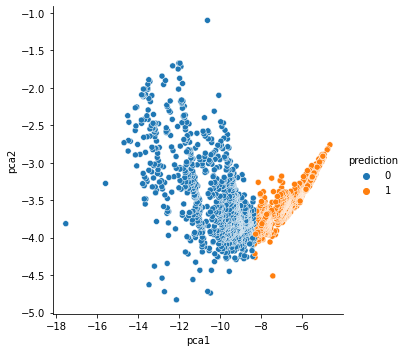

In [18]:
import seaborn as sns
import matplotlib.pylab as plt
sns.relplot("pca1", "pca2", hue="prediction", data=data)
plt.show()